In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.genfromtxt('./data/train.csv', delimiter=',', skip_header=1)

In [3]:
data.shape

(42000, 785)

In [5]:
data

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [7., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [6]:
X, Y = data[:, 1:], data[:, 0]

X = X.T

# What does the images looks like ?

In [7]:
def plotImage(index, X, Y):
    fig = plt.figure(figsize=(10,6))
    image = X.reshape(28,28)
    plt.imshow(image, cmap='gray')
    plt.title(f'Index: {index} \nLabel : {int(Y[index])}')
    plt.show()

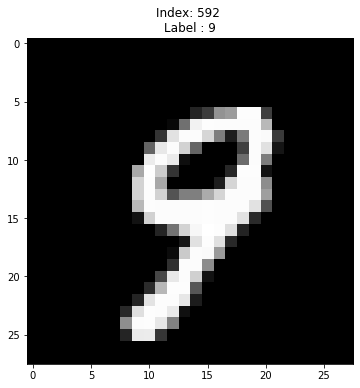

In [8]:
index = np.random.choice(range(X.shape[0]), size=1)

plotImage(index[0], X[:,index], Y)

# Let's train a neural network

## Initialize parameters

In [9]:
def initializeParams(layers_dim):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(42)
    epsilon = 1e-3
    
    params = {}
    
    for index in range(1, len(layers_dim)):
        params['W'+str(index)] = np.random.rand(layers_dim[index], layers_dim[index-1])
        params['b'+str(index)] = np.zeros((layers_dim[index-1], 1))

    return params

## Forward propagation

In [11]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W, A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    
    cache = (A, W, b)
    
    return Z, cache

In [12]:
def sigmoid(z):
    return 1./(1+ np.exp(-z))

def relu(z):
    return z * (z > 0)

def tanh(z):
    return np.tanh(z)

def softmax(z):
    return np.exp(z)/np.sum(np.exp(z))

In [13]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    Z, linear_cache = linear_forward(A_prev, W, b)

    if activation.lower() == 'sigmoid':
        A = sigmoid(Z)
        
    elif activation.lower() == 'relu':
        A = relu(Z)
        
    elif activation.lower() == 'tanh':
        A = tanh(Z)
        
    elif activation.lower() == 'softmax':
        A = softmax(Z)
        
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    
    return A

In [14]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """
    
    cache = []
    A = X
    L = len(parameters)//2
    
    for l in range(1, L):
        A = linear_activation_forward(A, parameters['W'+str(l)], parameters['b'+str(l)], 'relu')
        
    AL = linear_activation_forward(A, parameters['W'+str(l)], parameters['b'+str(l)], 'softmax')
    
    return AL

$$
CrossEntropyCost = - \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log \left(a_k^{[L](i)}\right)
$$

In [15]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = len(Y)
    K = AL.shape[0]
    
    cost = -1/len(m)*np.sum(np.sum(Y*np.log(AL), axis=0))
    
    cost = np.squeeze(cost)
    
    assert cost.shape == ()
    
    return cost

## Backpropagation parts TBD